## Imports

In [1]:
#import necessary libraries 
import math
import random
import statistics 
import time
from random import sample 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
### Initializations

In [2]:
#no of samples
n = 100000
#no of servers
N = 20
#unit time
T0 = 1
#Mean of Y
Y_mean = 10
#probability
q = 3/5
#mean of T
ET = T0 + (1-q)*Y_mean

In [3]:
#Generating Random numbers for Simulations
R1=[]
R2=[]
R3=[]
#using function random.uniform 
for i in range(n):
    R1.append(random.uniform(0,1))
    R2.append(random.uniform(0,1))
    R3.append(random.uniform(0,1))

In [ ]:
### Generating Samples Inter Arrival Time and Service Times

In [4]:
#Generating sample Inter Arrival Time
T=[]
for i in range(n):
    if R1[i]<=q:
        T.append(T0)
    else:
        T.append(round(T0-Y_mean*math.log(R2[i])))

In [5]:
T[1:20]
#Inter Arrival Time -Average
sum(T)/len(T)

4.9993

In [6]:
#Generating Service Time
EX = 99
#μ=1/99 given
alpha = 1/2
beta = EX/math.gamma(1+(1/alpha))
X = []
for i in range(n):
    X.append(max(1,min(100*EX,round(beta*(math.log(R3[i])**2)))))

In [7]:
X[1:20]
sum(X)/len(X)

98.94567

In [8]:
#function to generate service time based on different values of rho
def generate_service_time():
    RX = {}
    for r in [round(item,2) for item in np.arange(0.8,0.99,0.02)]:
        #rho = round(rho,2)
        #R = [random.uniform(0,1) for r in range(n)]
        EX = r*ET*N
        beta = EX/math.gamma(1+(1/alpha))
        Xs = []
        for i in range(n):
            Xs.append(max(1,min(100*EX,round(beta*(math.log(R3[i])**2)))))
        RX[r]=Xs
    
    return RX

In [9]:
#rhos
rhos=[round(item,2) for item in np.arange(0.8,0.99,0.02)]
rhos

[0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98]

In [10]:
#Simulation 
#sample of Service Time for different rhos
RX = generate_service_time()

###  POD-3

In [12]:
#Pod 3 method to select random server which has less queue
def pod3():
    s = sample(list(Server.keys()),3)
    queue = [len(Server[k]) for k in s]
    return s[queue.index(min(queue))]

#### Simulation of Server's Queue update
A method to maintain queues at server and process the tasks

In [11]:
def update(i,t):
    if len(Server[i])>=1:
        index = Server[i][0]
        if index >= t:
            d = index-t
            if d==0:
                if len(Server[i])>1:
                    Server[i]=Server[i][1:]
                else:
                    Server[i]=[]
            else:
                Server[i][0]=d
        else:
            t = t-index
            if len(Server[i])>1:
                Server[i]=Server[i][1:]
                update(i,t)
            else:
                Server[i]=[]

In [14]:
#Simulation of Pod-3
#Dictionary to store Mean Delay
Dp = {}
for rho in rhos:
    Xp = RX[rho]
    #Initiate number of servers with Queues
    Server = {}
    for i in range(1,N+1):
        Server[i]=[]
    WT = [0]*n
    wt=0
    temp =n
    j = 0
    while temp!=0:
        for i in range(1,N+1):
            update(i,T[j])
        s = pod3()
        Server[s].append(Xp[j])
        WT[j]= sum(Server[s])
        j+=1
        temp-=1
    Dp[rho]= sum(WT)/j

In [15]:
#sample output of the Server at the end of the task
Server

{1: [11.0,
  3.0,
  76.0,
  158.0,
  60.0,
  229.0,
  35.0,
  4.0,
  85.0,
  173.0,
  62.0,
  192.0,
  25.0,
  6.0,
  15.0,
  15.0],
 2: [868.0, 19.0, 7.0, 5.0, 7.0, 89.0, 4.0, 1, 119.0, 1, 43.0, 1, 3.0],
 3: [1.0, 141.0, 1, 298.0, 1, 1, 20.0, 32.0],
 4: [20.0, 1, 3.0, 1, 5.0, 14.0, 6.0, 30.0, 1, 49.0, 18.0, 93.0, 3.0],
 5: [390.0, 64.0, 57.0, 1, 6.0, 9.0, 9.0, 1, 2.0, 1, 13.0, 66.0, 147.0, 73.0],
 6: [31.0, 55.0, 12.0, 275.0, 14.0, 1, 7.0, 383.0, 1, 63.0, 3.0],
 7: [957.0,
  76.0,
  92.0,
  7.0,
  22.0,
  107.0,
  66.0,
  10.0,
  5.0,
  2.0,
  37.0,
  3.0,
  79.0],
 8: [43.0,
  32.0,
  1,
  379.0,
  9.0,
  4.0,
  1,
  5.0,
  13.0,
  73.0,
  32.0,
  173.0,
  1,
  1,
  1801.0,
  4.0,
  40.0,
  1],
 9: [466.0, 1, 1, 2.0, 1, 34.0, 838.0, 27.0, 11.0, 10.0, 15.0, 130.0, 118.0],
 10: [587.0, 56.0, 4.0, 1, 293.0, 24.0, 180.0, 22.0, 32.0, 319.0, 9.0],
 11: [17.0, 93.0, 59.0, 71.0, 347.0, 97.0, 1, 24.0, 3.0, 37.0, 1, 184.0],
 12: [134.0, 5.0, 362.0, 8.0, 45.0, 220.0, 29.0, 4.0, 28.0, 164.0, 40.

In [16]:
#Mean Delay of Pod
Dp

{0.8: 234.28558,
 0.82: 260.84882,
 0.84: 292.8601,
 0.86: 339.03526,
 0.88: 391.23629,
 0.9: 481.56804,
 0.92: 633.24694,
 0.94: 862.68912,
 0.96: 1318.93339,
 0.98: 2306.71723}

### JSQ

In [17]:
#a method to find shortest queue server and returns it
def JSQ():
    queue = [len(Server[k]) for k in range(1,N+1)]
    result = [i+1 for i,x in enumerate(queue) if x==min(queue)]
    #print(result)
    return sample(result,1)[0]

In [18]:
#to store delay
Ds={}
for rho in rhos:
    Xs = RX[rho]
    #Initiate number of servers with Queues
    Server = {}
    for i in range(1,N+1):
        Server[i]=[]
    WT = [0]*n
    temp =n
    j = 0
    while temp!=0:
        for i in range(1,N+1):
            update(i,T[j])
        s = JSQ()
        Server[s].append(Xs[j])
        WT[j]= sum(Server[s])
        j+=1
        temp-=1
    Ds[rho]= sum(WT)/j

In [19]:
#a sample output of server at end of tasks
Server

{1: [87.0, 19.0, 3.0, 1, 275.0, 98.0, 1, 2.0],
 2: [285.0, 9.0, 66.0, 5.0, 14.0, 164.0, 66.0, 155.0, 158.0],
 3: [171.0, 1, 37.0, 143.0, 2.0, 4.0, 1],
 4: [12.0,
  1,
  84.0,
  452.0,
  77.0,
  4.0,
  1,
  115.0,
  17.0,
  293.0,
  217.0,
  86.0,
  18.0,
  62.0,
  1],
 5: [18.0, 29.0, 1, 41.0, 1, 40.0, 10.0],
 6: [388.0, 15.0, 71.0, 86.0, 590.0, 49.0, 79.0, 319.0, 333.0],
 7: [38.0, 15.0, 24.0, 1, 51.0, 305.0, 1, 62.0, 932.0, 107.0],
 8: [35.0, 2.0, 1, 220.0, 130.0, 3.0, 10.0],
 9: [17.0, 798.0, 1, 30.0, 25.0, 1, 4.0, 141.0, 5.0, 7.0, 4.0],
 10: [55.0, 31.0, 46.0, 3.0, 1, 9.0, 3.0],
 11: [140.0, 5.0, 103.0, 1, 272.0, 21.0, 192.0, 20.0, 6.0, 135.0, 3.0, 714.0],
 12: [238.0, 97.0, 8.0, 1, 28.0, 118.0, 63.0, 32.0, 73.0],
 13: [928.0, 35.0, 4.0, 10.0, 48.0, 119.0, 22.0, 885.0, 6.0, 57.0],
 14: [1358.0,
  1,
  3.0,
  41.0,
  838.0,
  17.0,
  8.0,
  16.0,
  110.0,
  15.0,
  1,
  97.0,
  3.0,
  39.0],
 15: [7.0, 1, 11.0, 2.0, 3.0, 39.0, 3.0, 26.0],
 16: [54.0, 693.0, 4.0, 9.0, 137.0, 383.0, 1

In [20]:
#mean delay of JSQ
Ds

{0.8: 137.40582,
 0.82: 152.15491,
 0.84: 173.8015,
 0.86: 199.02448,
 0.88: 235.70369,
 0.9: 306.85382,
 0.92: 447.96221,
 0.94: 668.42936,
 0.96: 1087.33949,
 0.98: 2095.48296}

### JBT-d

In [12]:
#to keep track of threshold of each servers
table = [1]*N
#threshold
d=3
#method to select server based on threshold randomly
def JBTd():
    result = [i+1 for i,x in enumerate(table) if x==1]
    
    if len(result)==0:
        return sample(Server.keys(),1)[0]
    elif len(result)==1:
        return result[0]
    else:
        return sample(result,1)[0]

In [13]:
#calculating message send by server and server updating load balancer
def server_update(m):
    for i in range(1,N+1):
        if (len(Server[i])>d):
            table[i-1]=0
        elif (len(Server[i])<d):
            table[i-1]=1
            M[m]+=1
        else:
            pass

In [14]:
#to store delay
Db={}
#to store message overhead
Mb={}
for rho in rhos:
    Xb = RX[rho]
    #Initiate number of servers with Queues
    Server = {}
    for i in range(1,N+1):
        Server[i]=[]
    WT = [0]*n
    M = [0]*n
    temp =n
    j = 0
    while temp!=0:
        for i in range(1,N+1):
            update(i,T[j])
        s = JBTd()
        Server[s].append(Xb[j])
        server_update(j)
        WT[j]= sum(Server[s])
        j+=1
        temp-=1
    Db[rho]= sum(WT)/j
    Mb[rho]=sum(M)/j

In [33]:
#table like structure at load balancer
table

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [25]:
#sample Server status at end of the tasks
Server

{1: [83.0,
  10.0,
  166.0,
  1,
  26.0,
  19.0,
  9.0,
  1,
  176.0,
  9.0,
  74.0,
  11.0,
  1,
  20.0,
  7.0,
  77.0,
  4.0,
  5.0,
  103.0,
  23.0,
  71.0,
  1,
  2.0,
  1,
  88.0,
  1,
  19.0,
  3.0,
  12.0,
  1,
  33.0,
  5.0,
  255.0,
  4.0,
  1,
  15.0,
  5.0,
  28.0,
  9.0,
  16.0,
  4.0,
  1,
  13.0,
  1,
  35.0,
  3.0,
  1,
  1,
  15.0,
  89.0,
  3.0,
  1,
  4.0,
  1,
  1292.0,
  16.0,
  444.0,
  1,
  106.0,
  3.0,
  167.0,
  1,
  1,
  1,
  1,
  84.0,
  10.0,
  13.0,
  59.0,
  48.0,
  11.0,
  109.0,
  16.0,
  27.0,
  2.0,
  1,
  3.0,
  714.0,
  1,
  141.0,
  28.0,
  333.0,
  3.0],
 2: [1, 155.0],
 3: [153.0, 8.0, 110.0, 229.0, 3.0, 242.0, 92.0, 1, 2.0, 66.0, 32.0],
 4: [13.0, 1, 1, 9.0, 41.0, 73.0],
 5: [143.0, 118.0, 1],
 6: [16.0, 8.0, 6.0, 12.0],
 7: [23.0, 2.0, 11.0, 1, 383.0],
 8: [8.0,
  10.0,
  13.0,
  1,
  283.0,
  31.0,
  109.0,
  60.0,
  46.0,
  3.0,
  5.0,
  1,
  64.0,
  9.0,
  12.0,
  3.0,
  6.0,
  1,
  147.0,
  40.0],
 9: [20.0, 150.0, 8.0, 3.0, 164.0, 13.0],
 1

In [26]:
#delay of JBT-d
Db

{0.8: 256.92095,
 0.82: 276.64718,
 0.84: 299.49027,
 0.86: 327.51501,
 0.88: 375.64593,
 0.9: 457.73333,
 0.92: 595.21725,
 0.94: 831.4115,
 0.96: 1268.32321,
 0.98: 2324.46905}

In [15]:
#Average Message per task of JBT-d
Mb

{0.8: 8.52779,
 0.82: 7.90911,
 0.84: 7.25422,
 0.86: 6.50981,
 0.88: 5.79359,
 0.9: 5.02589,
 0.92: 4.15908,
 0.94: 3.3427,
 0.96: 2.40054,
 0.98: 1.45209}

### JOIN SHORTEST WAITING TIME QUEUE
#### NEW ALGORITHM

Below is the Slight Modified Algorithm of JSQ & JBTd.
In which the server maintains table of one bits reference to the server which has the lowest service time of waiting task+current running tasks.
The message overhead of this algorithm is 2N per task (N is number of server).

In [28]:
#table to maintain minimum waiting time server
waitable = [1]*N

In [29]:
#method of new algorithm which select server which is having min waiting time
def JSWTQ():
    result = [i+1 for i,x in enumerate(waitable) if x==1]
    if len(result)==0:
        return sample(Server.keys(),1)[0]
    elif len(result)==1:
        return result[0]
    else:
        return sample(result,1)[0]

In [30]:
#resetting table at dispatcher
def JSWTQ_update():
    queue = [sum(Server[k]) for k in range(1,N+1)]
    result = [i for i,x in enumerate(queue) if x==min(queue)]
    for i in range(0,N):
        if i in result:
            waitable[i]=1
        else:
            waitable[i]=0

In [31]:
#stores the delay
Dj={}
for rho in rhos:
    Xb = RX[rho]
    #Initiate number of servers with Queues
    Server = {}
    for i in range(1,N+1):
        Server[i]=[]
    WT = [0]*n
    temp =n
    j = 0
    while temp!=0:
        for i in range(1,N+1):
            update(i,T[j])
        s = JSWTQ()
        Server[s].append(Xb[j])
        JSWTQ_update()
        WT[j]= sum(Server[s])
        j+=1
        temp-=1
    Dj[rho]= sum(WT)/j

In [32]:
waitable

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [33]:
#sample output of server at end of the tasks
Server

{1: [855.0],
 2: [18.0,
  6.0,
  3.0,
  97.0,
  46.0,
  29.0,
  1,
  22.0,
  1,
  9.0,
  8.0,
  12.0,
  55.0,
  6.0,
  40.0,
  9.0,
  40.0,
  2.0,
  97.0,
  86.0,
  184.0],
 3: [415.0, 72.0, 29.0, 49.0, 28.0, 118.0, 1, 10.0, 73.0],
 4: [270.0, 13.0, 2.0, 35.0, 18.0, 298.0, 63.0, 32.0, 158.0],
 5: [179.0, 1, 57.0, 66.0, 66.0, 61.0, 22.0, 15.0, 71.0, 7.0, 39.0, 383.0],
 6: [6.0, 1, 35.0, 25.0, 1394.0],
 7: [103.0, 11.0, 2.0, 3.0, 7.0, 714.0],
 8: [222.0, 57.0, 1, 3.0, 27.0, 15.0, 61.0, 1, 5.0, 206.0, 79.0, 66.0, 283.0],
 9: [151.0, 151.0, 8.0, 1, 49.0, 1, 193.0, 26.0, 137.0, 147.0],
 10: [34.0, 43.0, 76.0, 1, 43.0, 7.0, 14.0, 1, 31.0, 150.0, 1, 362.0],
 11: [47.0,
  4.0,
  11.0,
  3.0,
  89.0,
  1,
  92.0,
  55.0,
  6.0,
  14.0,
  328.0,
  29.0,
  333.0],
 12: [35.0, 1, 135.0, 64.0, 6.0, 42.0, 2.0, 125.0, 8.0, 93.0, 590.0],
 13: [523.0, 1, 1, 4.0, 130.0, 319.0],
 14: [202.0,
  9.0,
  1,
  6.0,
  55.0,
  10.0,
  20.0,
  3.0,
  1,
  1,
  275.0,
  164.0,
  1,
  3.0,
  10.0,
  26.0],
 15: [4

In [34]:
#delay of new algorithm
Dj

{0.8: 107.42332,
 0.82: 118.54701,
 0.84: 133.83459,
 0.86: 154.05887,
 0.88: 183.78444,
 0.9: 249.79061,
 0.92: 386.02508,
 0.94: 611.73513,
 0.96: 1026.54274,
 0.98: 2055.00524}

### Plotting Graphs

Mean Delay of the algorithms for each rho values that we have calculated

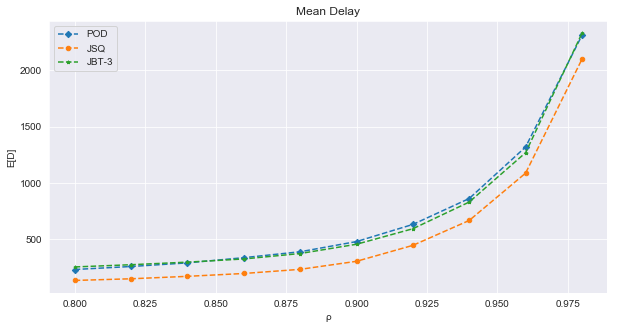

In [29]:
#plotting Graphs
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))

listPOD = sorted(Dp.items())
xPOD, yPOD = zip(*listPOD) 
plt.plot(xPOD, yPOD, label = "POD", marker='D', ls='--', ms=4.5)

listJSQ = sorted(Ds.items())
xJSQ, yJSQ = zip(*listJSQ)
plt.plot(xJSQ, yJSQ, label = "JSQ", marker='o', ls='--', ms=4.5)

listJBT = sorted(Db.items())
xJBT, yJBT = zip(*listJBT)
plt.plot(xJBT, yJBT, label = "JBT-3", marker='*', ls='--', ms=3.5)

plt.xlabel("\u03C1")
plt.ylabel("E[D]")
plt.title("Mean Delay")
plt.legend()
plt.show()

Message OverHeads Calculation Based on Formulae 

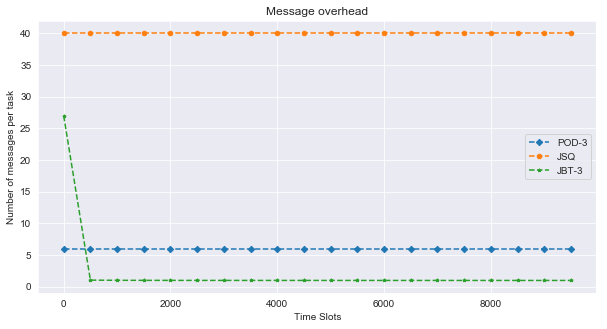

In [39]:
d=3
def messageoverheadPOD(T, N):
    return 2*d
def messageoverheadJSQ(T, N):
    return 2*N
def messageoverheadJBT(T, N):
    return 1 + (N+2*d)/T
Time = np.arange(1, 10000, 500)
POD = [messageoverheadPOD (T, d) for T in Time]
JSQ = [messageoverheadJSQ (T, N) for T in Time]
JBT = [messageoverheadJBT (T, N) for T in Time]
plt.figure(figsize=(10,5))
plt.plot(Time, POD, label = 'POD-3', marker='D', ls='--', ms=4.5)
plt.plot(Time, JSQ, label = 'JSQ', marker='o', ls='--', ms=4.5)
plt.plot(Time, JBT, label = 'JBT-3',  marker='*', ls='--', ms=3.5)
plt.xlabel('Time Slots')
plt.ylabel('Number of messages per task')
plt.title('Message overhead')
plt.legend()

Mean Message per task calculated for each value of rhos in system that we have simulated

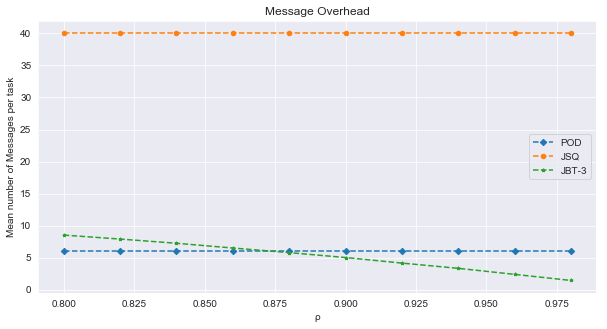

In [26]:
#plotting Graphs
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))

#listPOD = sorted(Dp.items())
d=3
yPOD=[0]*len(rhos)
for i in range(len(rhos)):
    yPOD[i]=2*d
plt.plot(rhos, yPOD, label = "POD", marker='D', ls='--', ms=4.5)

#listJSQ = sorted(Ds.items())
yJSQ=[0]*len(rhos)
for i in range(len(rhos)):
    yJSQ[i]=2*N
plt.plot(rhos, yJSQ, label = "JSQ", marker='o', ls='--', ms=4.5)

listJBT = sorted(Mb.items())
xJBT, yJBT = zip(*listJBT)
plt.plot(xJBT, yJBT, label = "JBT-3", marker='*', ls='--', ms=3.5)

plt.xlabel("\u03C1")
plt.ylabel("Mean number of Messages per task")
plt.title("Message Overhead")
plt.legend()
plt.show()

Plotting Mean Delay of JSQ and New Algorithm JSWTQ 

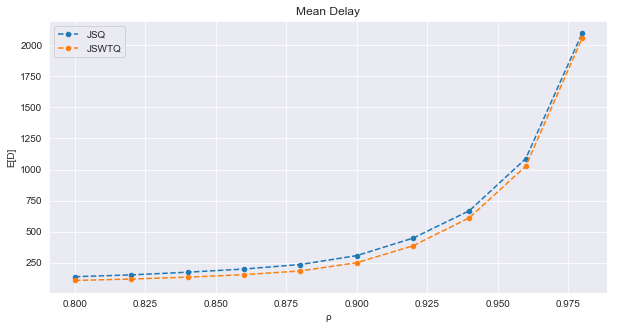

In [32]:
#plotting Graphs
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))

listJSQ = sorted(Ds.items())
xJSQ, yJSQ = zip(*listJSQ)
plt.plot(xJSQ, yJSQ, label = "JSQ", marker='o', ls='--', ms=4.5)

listJSWTQ = sorted(Dj.items())
xJSWTQ, yJSWTQ = zip(*listJSWTQ)
plt.plot(xJSWTQ, yJSWTQ, label = "JSWTQ", marker='o', ls='--', ms=4.5)

plt.xlabel("\u03C1")
plt.ylabel("E[D]")
plt.title("Mean Delay")
plt.legend()
plt.show()

Message Overhead comparision of JSQ and New Algorithm 

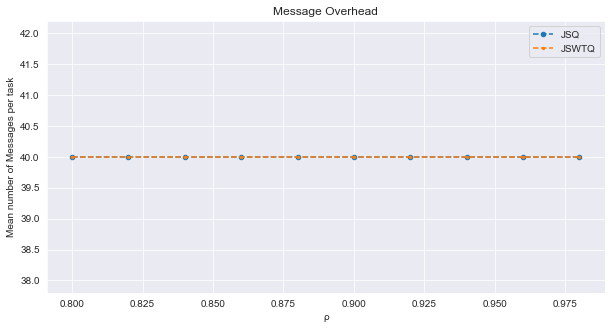

In [24]:
#plotting Graphs
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))

yJSQ=[0]*len(rhos)
for i in range(len(rhos)):
    yJSQ[i]=2*N
plt.plot(rhos, yJSQ, label = "JSQ", marker='o', ls='--', ms=4.5)

yJSWTQ=[0]*len(rhos)
for i in range(len(rhos)):
    yJSWTQ[i]=2*N
plt.plot(rhos, yJSWTQ, label = "JSWTQ", marker='.', ls='--', ms=4.5)

plt.xlabel("\u03C1")
plt.ylabel("Mean number of Messages per task")
plt.title("Message Overhead")
plt.legend()
plt.show()